In [8]:
import xarray as xr
import xroms
import matplotlib.pyplot as plt
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import hvplot.xarray
import geoviews as gv
import cmocean.cm as cmo

# How to plot

This notebook demonstrates how to plot ROMS model output from a planview ($x$-$y$) and an $x$-$z$ cross-section.

Also, the notebook uses both matplotlib and hvplot to demonstrate static vs. interactive approaches.

All of the plots use cartopy in order to plot on a geographically-correct map with a projection and access to coastline data, etc.

HOW TO PLOT WITH COORDINATES, ON MAPS, etc, ADD COASTLINE AT DIFF RES

Can plot directly from `xarray`, but have less control than using cartopy and projections more directly. Best for quick plots.x 

how to plot subregion without having extra white space

## Load in data

More information at in [load_data notebook](load_data.ipynb)

In [2]:
loc = 'http://barataria.tamu.edu:8080/thredds/dodsC/forecast_latest/txla2_his_f_latest.nc'
chunks = {'ocean_time':1}
ds = xr.open_dataset(loc, chunks=chunks)

In [28]:
# set up grid
ds, grid = xroms.roms_dataset(ds)

## Setup plots

In [3]:
proj = cartopy.crs.LambertConformal(central_longitude=-98, central_latitude=30)
pc = cartopy.crs.PlateCarree()

In [4]:
# def setup(ax):
    
#     ax.set_extent([-98, -87.5, 22.8, 30.5], ccrs.PlateCarree())
#     gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
#     # the following two make the labels look like lat/lon format
#     gl.xformatter = LONGITUDE_FORMATTER
#     gl.yformatter = LATITUDE_FORMATTER
#     gl.xlabels_bottom = False  # turn off labels where you don't want them
#     gl.ylabels_right = False
    
#     return ax
    

## matplotlib (static)

### map view

#### Overview

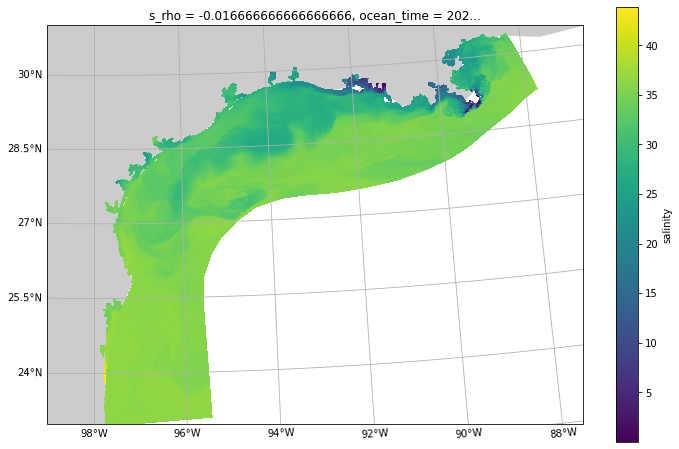

In [23]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=proj)

ax.set_extent([-99, -87.5, 23, 30.5], crs=pc)
ax.add_feature(cartopy.feature.LAND.with_scale('110m'), facecolor='0.8')
gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False, xlocs=np.arange(-104,-80,2))

# manipulate `gridliner` object
gl.top_labels = False
gl.right_labels = False
# gl.xlines = False
# gl.ylines = False

ds.salt.isel(ocean_time=0, s_rho=-1).plot(ax=ax, x='lon_rho', y='lat_rho', transform=pc)

#### Magnified

### cross-section

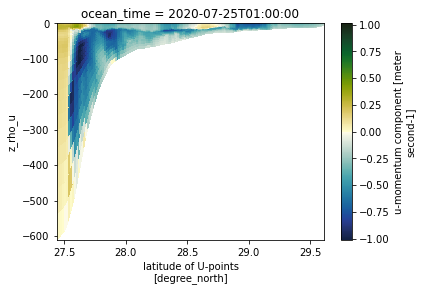

In [47]:
dss = ds.u.isel(xi_u=300, ocean_time=0)
dss.where(~dss.isnull(), drop=True).plot(x='lat_u', y='z_rho_u', cmap=cmo.delta)

## Interactive

### map view

Can zoom and 

In [7]:

tiles = gv.tile_sources.ESRI  # optional, for a basemap
ds.salt.isel(s_rho=-1).hvplot.quadmesh(x='lon_rho', y='lat_rho', width=650, height=500,
                        cmap=cmo.haline, rasterize=True, crs=pc) * tiles

:DynamicMap   [ocean_time]
   :Overlay
      .Image.I :Image   [lon_rho,lat_rho]   (salt)
      .WMTS.I  :WMTS   [Longitude,Latitude]

### cross-section

In [54]:
ds.salt.isel(xi_rho=80)

<xarray.DataArray 'salt' (ocean_time: 96, s_rho: 30, eta_rho: 191)>
dask.array<getitem, shape=(96, 30, 191), dtype=float32, chunksize=(1, 30, 191), chunktype=numpy.ndarray>
Coordinates:
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
    lon_rho     (eta_rho) float64 dask.array<chunksize=(191,), meta=np.ndarray>
    lat_rho     (eta_rho) float64 dask.array<chunksize=(191,), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2020-07-25T01:00:00 ... 2020-07-29
    z_rho       (ocean_time, s_rho, eta_rho) float64 dask.array<chunksize=(1, 30, 191), meta=np.ndarray>
Dimensions without coordinates: eta_rho
Attributes:
    long_name:    salinity
    time:         ocean_time
    grid:         grid
    location:     face
    field:        salinity, scalar, series
    _ChunkSizes:  [  1  15  96 336]

In [53]:
ds.salt.isel(xi_rho=80).hvplot.quadmesh(x='lat_rho', y='z_rho', width=650, height=500,
                        cmap=cmo.haline, rasterize=True)

Invoked as dynamic_operation(height=500, scale=1.0, width=650, x_range=None, y_range=None)
Invoked as dynamic_operation(height=500, scale=1.0, width=650, x_range=None, y_range=None)


ValueError: Ensure that x- and y-coordinate arrays share the same dimensions. x-coordinates are indexed by ('eta_rho',) dims while y-coordinates are indexed by ('ocean_time', 's_rho', 'eta_rho') dims.

:DynamicMap   []